# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

<span style="color:red">**Answer:** *The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.*</span>

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



<span style="color:red">**Data preprocessing:** *Instead of manually changing the raw data, except for null and duplicate clean up, following will be applied:*</span>  
 
<span style="color:red">*PolynomialFeatures - detect non-linear patterns for logistic regression & SVM   
StandardScaler - to use the same scale  
OrdinalEncoder - changing object/categorical values to ordered numeric  
OneHotEncoder - changing object/categorical to numeric binary values   
PCA - find the principle components for optimal outcome*</span>

<span style="color:red">*Data already was very clean except for some duplicates, so not much to clean.  
However, considering 'unknown' as np.nan, "default' column had about 21% null.
Given that the data came with 'unknown' value, this will be considered a value and would also give insights into people with unknown default status.*</span>

In [5]:
dfc = df.copy()                 #creating a copy of dataset to retain the original copy
display(dfc.info())
display(dfc.isnull().mean())     #Non of the data is missing
display(dfc.duplicated().mean()) #Very little duplication
dfc = dfc.drop_duplicates()       #removing duplicates.

# Code used to identify 'unknown' values and commented out for clean display
# import numpy as np
# dfc = dfc.replace('unknown', np.nan)
# display(dfc.isnull().mean())     #Non of the data is missing
# display(dfc.duplicated().mean()) #Very little duplication



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

0.0002913469942701758

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

<span style="color:red"> **Business Objective**:  *The business goal of this task is to increase the efficiency of the marketing campaigns achieving long-term deposit subscriptions.  By figuring out optimal feature values in features such as contact and duration and etc, the best combination to achieve highest efficiency can be found.  With the findings, very efficiency resource allocations and planning of marketing campaigns can be achieved as well* </span>

In [6]:
df.info()
for col in dfc.select_dtypes(include=object):
    display(dfc[col].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

job
admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
unknown          0.008014
Name: proportion, dtype: float64

marital
married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: proportion, dtype: float64

education
university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
basic.4y               0.101418
basic.6y               0.055639
unknown                0.042015
illiterate             0.000437
Name: proportion, dtype: float64

default
no         0.791165
unknown    0.208762
yes        0.000073
Name: proportion, dtype: float64

housing
yes        0.523873
no         0.452084
unknown    0.024043
Name: proportion, dtype: float64

loan
no         0.824218
yes        0.151739
unknown    0.024043
Name: proportion, dtype: float64

contact
cellular     0.634714
telephone    0.365286
Name: proportion, dtype: float64

month
may    0.334345
jul    0.174106
aug    0.149990
jun    0.129153
nov    0.099573
apr    0.063896
oct    0.017413
sep    0.013843
mar    0.013260
dec    0.004420
Name: proportion, dtype: float64

day_of_week
thu    0.209297
mon    0.206722
wed    0.197542
tue    0.196377
fri    0.190062
Name: proportion, dtype: float64

poutcome
nonexistent    0.863391
failure        0.103264
success        0.033345
Name: proportion, dtype: float64

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [13]:


# K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance

number_list = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
ohe_list = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']    # month and day should be unordered for this task
ordinal_features = ['education']
education_ordinal_values = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'university.degree', 'professional.course'] 
      

lr_preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler())
    ]), number_list),
    ('ord', OrdinalEncoder(categories=[education_ordinal_values]), ordinal_features),
    ('nom', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), ohe_list)
    ])

svc_preprocessor = ColumnTransformer([
    ('num', Pipeline([
        #('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler())
    ]), number_list),
    ('ord', OrdinalEncoder(categories=[education_ordinal_values]), ordinal_features),
    ('nom', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), ohe_list)
    ])

tree_preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('scaler', StandardScaler())
    ]), number_list),
    ('ord', OrdinalEncoder(categories=[education_ordinal_values]), ordinal_features),
    ('nom', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), ohe_list)
    ])

knn_preprocessor = ColumnTransformer([
    ('num', Pipeline([ 
        ('scaler', StandardScaler())
    ]), number_list),
    ('ord', OrdinalEncoder(categories=[education_ordinal_values]), ordinal_features),
    ('nom', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), ohe_list)
    ])


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [8]:
X = dfc.drop('y', axis = 1)
y = dfc['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# display(X_train.info())
# display(y_train.info())


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [9]:
from multiprocessing import dummy
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(pipeline, X, y):
    y_pred = pipeline.predict(X)
    return {
        'Model': type(pipeline.named_steps['classifier']).__name__ if isinstance(pipeline, Pipeline) else type(pipeline).__name__,
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred, average='binary', pos_label='yes'),
        'Recall': recall_score(y, y_pred, average='binary', pos_label='yes'),
        'F1': f1_score(y, y_pred, average='binary', pos_label='yes')
    }


dummy_clf = DummyClassifier().fit(X=X_train, y=y_train)
#print(dummy_clf.score(X=X_test, y=y_test))
evaluate(dummy_clf, X_test, y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Model': 'DummyClassifier',
 'Accuracy': 0.8834272391684477,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1': 0.0}

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [47]:

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix



pipeline = Pipeline([
    ('preprocess', lr_preprocessor),
    ('pca', PCA()),
    ('classifier', LogisticRegression(max_iter=2000))    #added max_iter to complete the convergence
])
pipeline.fit(X=X_train, y=y_train)
display(evaluate(pipeline, X_train, y_train))
display(evaluate(pipeline, X_test, y_test))


{'Model': 'LogisticRegression',
 'Accuracy': 0.9149990285603264,
 'Precision': 0.6651785714285714,
 'Recall': 0.47659203256760685,
 'F1': 0.5553108588853125}

{'Model': 'LogisticRegression',
 'Accuracy': 0.9091703905187488,
 'Precision': 0.6594464500601684,
 'Recall': 0.45666666666666667,
 'F1': 0.5396356474643033}

### Problem 9: Score the Model

What is the accuracy of your model?

<span style="color:red"> **Anwser:** *The accuracy of LogisticRegression(max_iter=2000) was 0.9091703905187488, better than from DummyClassifier which is about the % of majority in the imbalanced data.*</span>

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [11]:
from statistics import LinearRegression
import time

from numpy.core.umath import concatenate


list_of_models = [LogisticRegression(max_iter=2000), KNeighborsClassifier(), DecisionTreeClassifier(), SVC()]

train_list = []
test_list = []

for model in list_of_models:
    mname = type(model).__name__
    match mname:
        case 'LogisticRegression':
            pipeline = Pipeline([
                ('preprocess', lr_preprocessor),
                ('pca', PCA()),
                ('classifier', model)     
            ])
        case 'KNeighborsClassifier':
                pipeline = Pipeline([
                ('preprocess', knn_preprocessor),
                ('pca', PCA()),
                ('classifier', model)    
            ])
        case 'DecisionTreeClassifier':
                pipeline = Pipeline([
                ('preprocess', tree_preprocessor),
                ('pca', PCA()),
                ('classifier', model)    
            ])      
        case 'SVC':
                pipeline = Pipeline([
                ('preprocess', svc_preprocessor),
                ('pca', PCA()),
                ('classifier', model)    
            ])
    
    
    start_time = time.time()
    pipeline.fit(X=X_train, y=y_train)
    end_time = time.time()
    duration_ms = (end_time - start_time) * 1000
    train_dic = evaluate(pipeline, X_train, y_train)
    train_dic['training_time'] = duration_ms
    test_dic = evaluate(pipeline, X_test, y_test)
    test_dic['training_time'] = duration_ms
    train_list.append(train_dic)
    test_list.append(test_dic)

train_list_df = pd.DataFrame(train_list)
test_list_df =pd.DataFrame(test_list)
    
final_table_df = train_list_df.rename(columns={'Accuracy': 'Train Accuracy', 'training_time': 'Train Time (ms)'})[['Model', 'Train Time (ms)', 'Train Accuracy']]
final_table_df = pd.concat([final_table_df, test_list_df.rename(columns={'Accuracy':'Test Accuracy'})[['Test Accuracy']]], axis=1)

display(train_list_df.head())
display(test_list_df.head())

display(final_table_df)



,Model,Accuracy,Precision,Recall,F1,training_time
0,LogisticRegression,0.914999,0.665179,0.476592,0.555311,981.594801
1,KNeighborsClassifier,0.928599,0.740640,0.552195,0.632684,90.818882
2,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,3513.758659
3,SVC,0.920310,0.729793,0.451585,0.557931,17208.580732


,Model,Accuracy,Precision,Recall,F1,training_time
0,LogisticRegression,0.909170,0.659446,0.456667,0.539636,981.594801
1,KNeighborsClassifier,0.896056,0.577197,0.405000,0.476004,90.818882
2,DecisionTreeClassifier,0.877210,0.474068,0.487500,0.480690,3513.758659
3,SVC,0.906548,0.666667,0.396667,0.497388,17208.580732


,Model,Train Time (ms),Train Accuracy,Test Accuracy
0,LogisticRegression,981.594801,0.914999,0.909170
1,KNeighborsClassifier,90.818882,0.928599,0.896056
2,DecisionTreeClassifier,3513.758659,1.000000,0.877210
3,SVC,17208.580732,0.920310,0.906548


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

<span style='color:red'>*The output for problem 10 shows that the accuracy is lower with the test data meaning that the model is overfitted with the training data.  Given that the models are built without any optimization and with default setting, it was expected to show this behavior.  Especially with DecisionTree showing 100% accuracy in training data meaning that it trained on every training samples.*  This would require further optimization by more feature engineering and finding the optimal hyperparameters using grid search</span>

*<span style='color:red'>**Running below code takes about 20 min with 2GHz ~ 3GHz CPU speed and 16 core at about 70% utilization.  SVS took about 85% of ~20min grid search cv time.**</span>*

In [17]:
param_grids = {
    'LogisticRegression': {
        'preprocess__num__poly__degree': [1, 2],
        'pca__n_components': [0.95, 0.99],
        'classifier__penalty': ['l1', 'l2', 'elasticnet'],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['lbfgs', 'liblinear', 'saga'],
        'classifier__max_iter': [2000]
    },
 
    'KNN': {
        'pca__n_components': [0.95, 0.99],
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    },

    'DecisionTree': {
        'pca__n_components': [0.95, 0.99],
        'classifier__criterion': ['gini', 'entropy', 'log_loss'],
        'classifier__max_depth': [5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },

    'SVC': {
        #'preprocess__num__poly__degree': [1, 2],
        'pca__n_components': [0.95, 0.99],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto'],
        'classifier__degree': [2, 3]                     # Only relevant for 'poly' kernel
    }
}



best_scores = []
best_estimator = []
 
pipeline = Pipeline([
    ('preprocess', lr_preprocessor),
    ('pca', PCA()),
    ('classifier', list_of_models[0])     
]) 

grid = GridSearchCV(pipeline, param_grid=param_grids['LogisticRegression'], cv=3, n_jobs=-1)  
#grid = HalvingRandomSearchCV(estimator=pipeline, param_distributions=param_grids['LogisticRegression'], cv=3, random_state=42, n_jobs=-1)
#grid = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grids['LogisticRegression'], n_iter=100, cv=3, scoring='accuracy', random_state=42)
grid.fit(X_train, y_train)    

best_scores.append({'LogisticRegression: best_score_': grid.best_score_})
best_estimator.append({'LogisticRegression: best_params_': grid.best_params_})

pipeline = Pipeline([
    ('preprocess', lr_preprocessor),
    ('pca', PCA()),
    ('classifier', list_of_models[1])     
]) 
grid = GridSearchCV(pipeline, param_grid=param_grids['KNN'], cv=3, n_jobs=-1) 
#grid = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grids['KNN'], n_iter=100, cv=3, scoring='accuracy', random_state=42) 
grid.fit(X_train, y_train)    

best_scores.append({'KNN: best_score_': grid.best_score_})
best_estimator.append({'KNN: best_params_': grid.best_params_})

pipeline = Pipeline([
    ('preprocess', lr_preprocessor),
    ('pca', PCA()),
    ('classifier', list_of_models[2])     
]) 
grid = GridSearchCV(pipeline, param_grid=param_grids['DecisionTree'], cv=3, n_jobs=-1)  
grid.fit(X_train, y_train)    

best_scores.append({'DecisionTree: best_score_': grid.best_score_})
best_estimator.append({'DecisionTree: best_params_': grid.best_params_})


pipeline = Pipeline([
    ('preprocess', lr_preprocessor),
    ('pca', PCA()),
    ('classifier', list_of_models[3])     
]) 
#grid = GridSearchCV(pipeline, param_grid=param_grids['SVC'], cv=3, n_jobs=-1)  
grid = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grids['SVC'], n_iter=100, cv=3, scoring='accuracy', random_state=42, n_jobs=-1) 
grid.fit(X_train, y_train)    

best_scores.append({'SVC: best_score_': grid.best_score_})
best_estimator.append({'SVC: best_params_': grid.best_params_})

display(best_scores)
display(best_estimator)

 
 

 


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.f

[{'LogisticRegression: best_score_': 0.9126351920212422},
 {'KNN: best_score_': 0.9077456123308075},
 {'DecisionTree: best_score_': 0.9067094100123049},
 {'SVC: best_score_': 0.9117932776374587}]

[{'LogisticRegression: best_params_': {'classifier__C': 0.1,
   'classifier__max_iter': 2000,
   'classifier__penalty': 'l1',
   'classifier__solver': 'saga',
   'pca__n_components': 0.99,
   'preprocess__num__poly__degree': 2}},
 {'KNN: best_params_': {'classifier__metric': 'euclidean',
   'classifier__n_neighbors': 7,
   'classifier__weights': 'distance',
   'pca__n_components': 0.99}},
 {'DecisionTree: best_params_': {'classifier__criterion': 'gini',
   'classifier__max_depth': 5,
   'classifier__min_samples_leaf': 1,
   'classifier__min_samples_split': 5,
   'pca__n_components': 0.95}},
 {'SVC: best_params_': {'pca__n_components': 0.99,
   'classifier__kernel': 'poly',
   'classifier__gamma': 'scale',
   'classifier__degree': 2,
   'classifier__C': 10}}]

<span style="color:red">**Best Scores**</span>  
` [{'LogisticRegression: best_score_': 0.9126351920212422},
 {'KNN: best_score_': 0.9077456123308075},
 {'DecisionTree: best_score_': 0.9067094100123049},
 {'SVC: best_score_': 0.9117932776374587}]
`  
<span style="color:red">**Best Parameters**</span>    
` [{'LogisticRegression: best_params_': {'classifier__C': 0.1,
   'classifier__max_iter': 2000,
   'classifier__penalty': 'l1',
   'classifier__solver': 'saga',
   'pca__n_components': 0.99,
   'preprocess__num__poly__degree': 2}},
 {'KNN: best_params_': {'classifier__metric': 'euclidean',
   'classifier__n_neighbors': 7,
   'classifier__weights': 'distance',
   'pca__n_components': 0.99}},
 {'DecisionTree: best_params_': {'classifier__criterion': 'gini',
   'classifier__max_depth': 5,
   'classifier__min_samples_leaf': 1,
   'classifier__min_samples_split': 5,
   'pca__n_components': 0.95}},
 {'SVC: best_params_': {'pca__n_components': 0.99,
   'classifier__kernel': 'poly',
   'classifier__gamma': 'scale',
   'classifier__degree': 2,
   'classifier__C': 10}}]
`
  
*<span style='color:red'>**Re-running model training below and getting the best scores for accuracy and training times to compare against the earlier result. It look the training accuracy seem more reasonable and less overfitting and test accuracy became slightly closer to the training accuracy meaning less overfitting.**</span>*

In [19]:
list_of_models = [LogisticRegression(max_iter=2000, penalty='l1', solver='saga', C=0.1), 
                  KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance'), 
                  DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=5 ), 
                  SVC(kernel='poly', gamma='scale', degree=2, C=10)]

train_list = []
test_list = []

for model in list_of_models:
    mname = type(model).__name__
    match mname:
        case 'LogisticRegression':
            pipeline = Pipeline([
                ('preprocess', lr_preprocessor),
                ('pca', PCA(n_components=0.99)),
                ('classifier', model)     
            ])
        case 'KNeighborsClassifier':
                pipeline = Pipeline([
                ('preprocess', knn_preprocessor),
                ('pca', PCA(n_components=0.99)),
                ('classifier', model)    
            ])
        case 'DecisionTreeClassifier':
                pipeline = Pipeline([
                ('preprocess', tree_preprocessor),
                ('pca', PCA(n_components=0.95)),
                ('classifier', model)    
            ])      
        case 'SVC':
                pipeline = Pipeline([
                ('preprocess', svc_preprocessor),
                ('pca', PCA(n_components=0.99)),
                ('classifier', model)    
            ])
    
    
    start_time = time.time()
    pipeline.fit(X=X_train, y=y_train)
    end_time = time.time()
    duration_ms = (end_time - start_time) * 1000
    train_dic = evaluate(pipeline, X_train, y_train)
    train_dic['training_time'] = duration_ms
    test_dic = evaluate(pipeline, X_test, y_test)
    test_dic['training_time'] = duration_ms
    train_list.append(train_dic)
    test_list.append(test_dic)

train_list_df = pd.DataFrame(train_list)
test_list_df =pd.DataFrame(test_list)
    
final_table_after_df = train_list_df.rename(columns={'Accuracy': 'Train Accuracy', 'training_time': 'Train Time (ms)'})[['Model', 'Train Time (ms)', 'Train Accuracy']]
final_table_after_df = pd.concat([final_table_after_df, test_list_df.rename(columns={'Accuracy':'Test Accuracy'})[['Test Accuracy']]], axis=1)

display(train_list_df.head())
display(test_list_df.head())

display(final_table_after_df)



,Model,Accuracy,Precision,Recall,F1,training_time
0,LogisticRegression,0.913412,0.659574,0.459727,0.541809,1253.026962
1,KNeighborsClassifier,1.000000,1.000000,1.000000,1.000000,83.126068
2,DecisionTreeClassifier,0.909948,0.703589,0.330619,0.449852,413.279533
3,SVC,0.909073,0.731475,0.289910,0.415244,21838.720798


,Model,Accuracy,Precision,Recall,F1,training_time
0,LogisticRegression,0.907519,0.655388,0.435833,0.523524,1253.026962
1,KNeighborsClassifier,0.900719,0.613811,0.400000,0.484359,83.126068
2,DecisionTreeClassifier,0.901205,0.666667,0.305000,0.418525,413.279533
3,SVC,0.901010,0.693790,0.270000,0.388722,21838.720798


,Model,Train Time (ms),Train Accuracy,Test Accuracy
0,LogisticRegression,1253.026962,0.913412,0.907519
1,KNeighborsClassifier,83.126068,1.000000,0.900719
2,DecisionTreeClassifier,413.279533,0.909948,0.901205
3,SVC,21838.720798,0.909073,0.901010


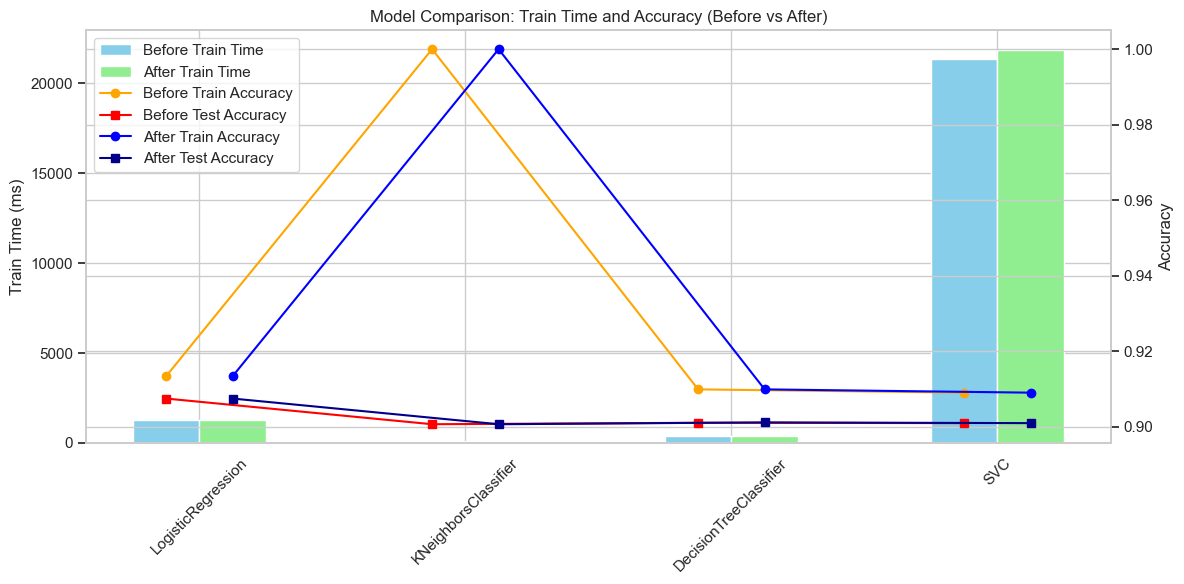

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'SVC']
x = np.arange(len(models))
bar_width = 0.25

# Before
before_train_time = final_table_df['Train Time (ms)'].to_numpy()
before_train_acc = final_table_df['Train Accuracy'].to_numpy()
before_test_acc = final_table_df['Test Accuracy'].to_numpy()

# After
after_train_time = final_table_after_df['Train Time (ms)'].to_numpy()
after_train_acc = final_table_after_df['Train Accuracy'].to_numpy()
after_test_acc = final_table_after_df['Test Accuracy'].to_numpy()

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plots for train time
ax1.bar(x - bar_width/2, before_train_time, width=bar_width, label='Before Train Time', color='skyblue')
ax1.bar(x + bar_width/2, after_train_time, width=bar_width, label='After Train Time', color='lightgreen')
ax1.set_ylabel('Train Time (ms)')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45)

# Line plots for accuracy
ax2 = ax1.twinx()
ax2.plot(x - bar_width/2, before_train_acc, marker='o', label='Before Train Accuracy', color='orange')
ax2.plot(x - bar_width/2, before_test_acc, marker='s', label='Before Test Accuracy', color='red')
ax2.plot(x + bar_width/2, after_train_acc, marker='o', label='After Train Accuracy', color='blue')
ax2.plot(x + bar_width/2, after_test_acc, marker='s', label='After Test Accuracy', color='darkblue')
ax2.set_ylabel('Accuracy')

# Title and legend
ax1.set_title('Model Comparison: Train Time and Accuracy (Before vs After)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', ncol=1)

plt.tight_layout()
plt.show()


##### Questions